<a href="https://colab.research.google.com/github/xtianu/CV_Tirana/blob/main/M1_Image%20Processing/Exercise%201_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: IMAGE PREPROCESSING

Module 1: Image Preprocessing
Christian Mata, PhD

# Exercise 1

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

**- Task 1:** Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

**- Task 2:** Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:

* ‘gaussian’ Gaussian-distributed additive noise.
* ‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
* ‘poisson’ Poisson-distributed noise generated from the data.
* ‘salt’ Replaces random pixels with 1.
* ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
* ‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
* ‘speckle’ Multiplicative noise using out = image + n*image, where
n is Gaussian noise with specified mean & variance.

Documentation of the function can be found at
https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise

**- Task 3:** Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

**- Task 4:** The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

**- Task 5:** Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

**- Task 6:** Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

**- Task 7:** Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs
How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk




# Solution

In [ ]:
# !conda install -y matplotlib numpy scikit-image scipy


Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/m/miniconda3/envs/cv_tirana

  added / updated specs:
    - matplotlib
    - numpy
    - scikit-image
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    brotli-python-1.0.9        |  py311h6a678d5_9         356 KB
    contourpy-1.3.1            |  py311hdb19cb5_0         277 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    cyrus-sasl-2.1.28          |       h52b45da_1         237 KB
    fontconfig-2.14.1          |       h55d465d_3         281 KB
    fonttools-4.55.3           |  py311h5eee18b_0         3.0 MB
    freetype-2.13.3            |       h4a9f257_0         686 KB
    imageio-2.37.0             |  py311h06a4308_0         630 KB
    intel-openmp-2023.1.0      |   hd

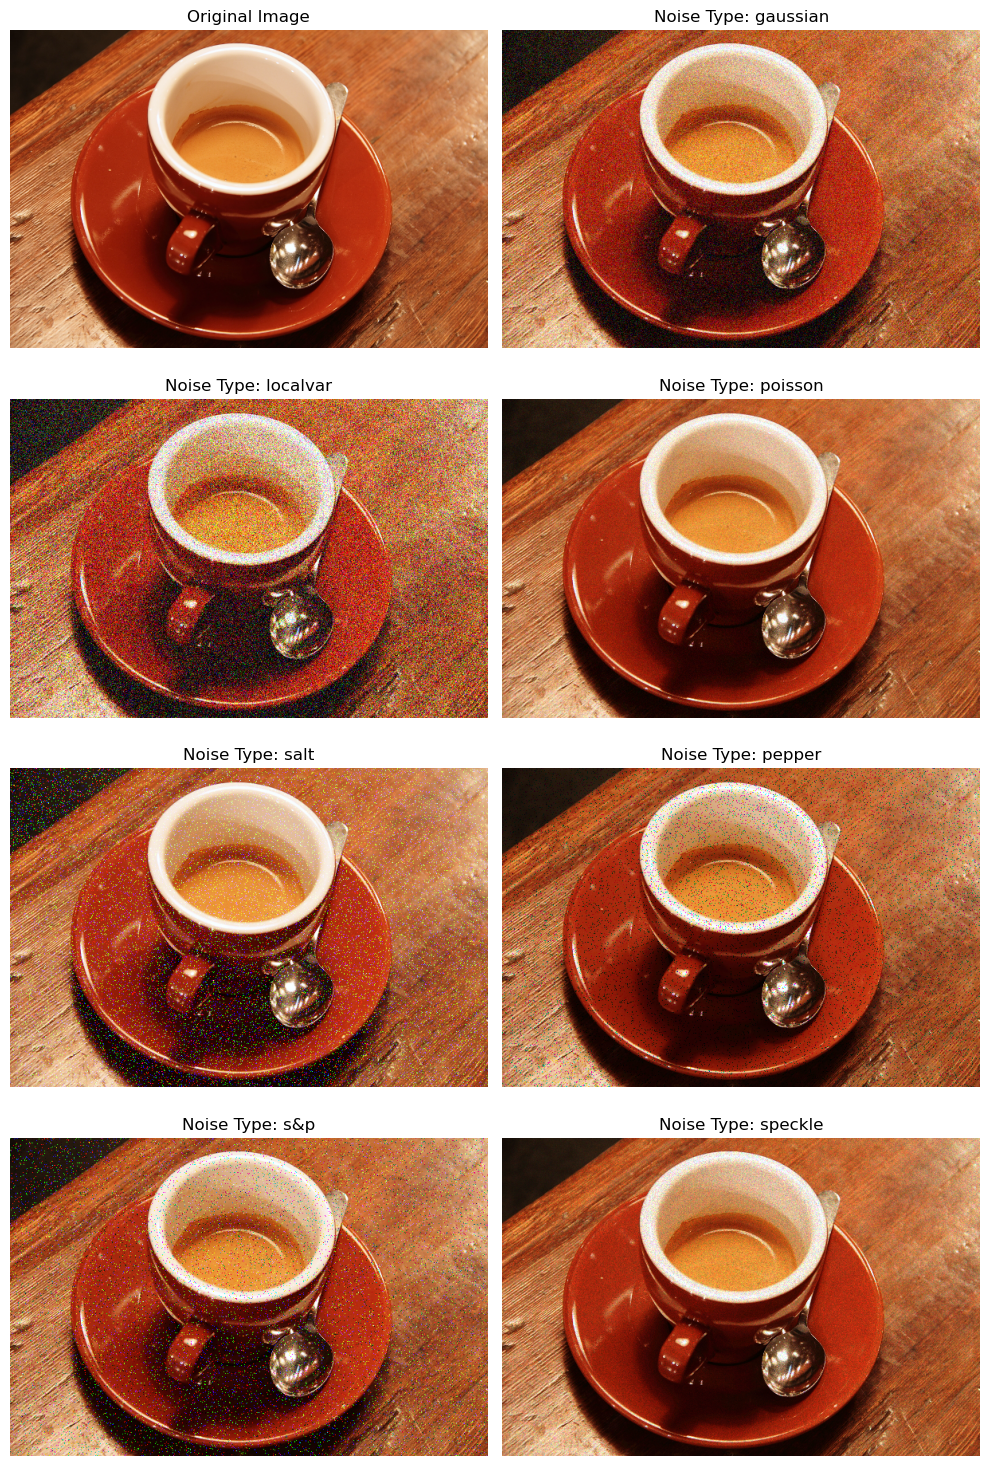

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_uint
from skimage.util import random_noise
from skimage.filters import gaussian, prewitt
from skimage.data import binary_blobs
from skimage.morphology import erosion, disk
from skimage.color import rgb2gray
from scipy import ndimage
import math

# Task 1: Load the 'coffee' image
coffee = data.coffee()

# Task 2: Add different types of noise and display
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']
fig, axes = plt.subplots(4, 2, figsize=(10, 15))  # Create a 4x2 grid of subplots

# Plot the original image in the top-left corner
axes[0, 0].imshow(coffee, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Add noise to the image and plot the results
for i, noise_type in enumerate(noise_types):
    # Calculate the row and column index for the subplot
    row = (i + 1) // 2  # Start from the second row
    col = (i + 1) % 2

    # Add noise to the image using the specified mode
    if noise_type == 'localvar':
        # Generate localvar noise using a separate method
        local_variance = np.random.rand(*coffee.shape) * 0.1  # Adjust variance as needed
        noisy_image = random_noise(coffee, mode='gaussian', var=local_variance)
    else:
        noisy_image = random_noise(coffee, mode=noise_type)

    # Display the noisy image in the current subplot
    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Noise Type: {noise_type}')
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

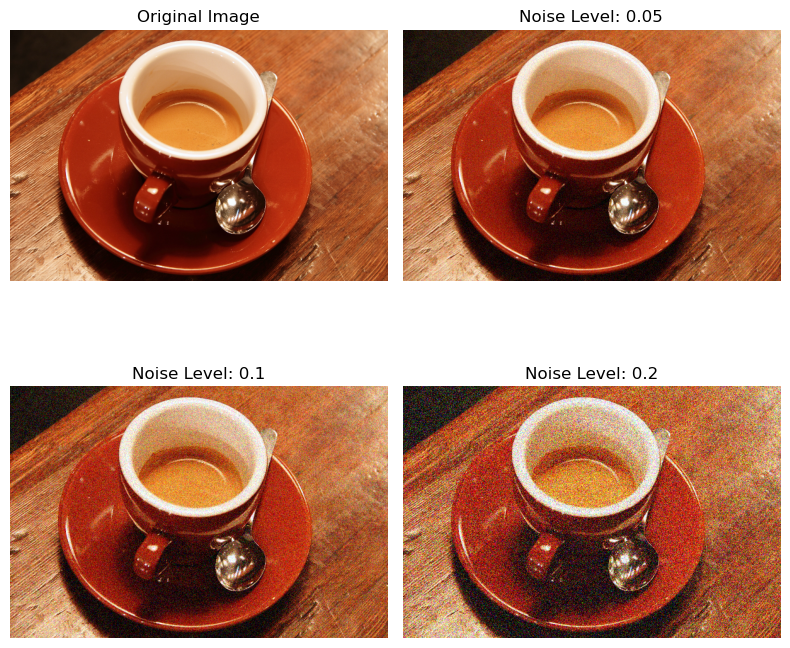

In [10]:
# Task 3: Generate noisy images with different intensity levels
noise_type = 'gaussian'  # Select your desired noise type
noise_levels = [0.05, 0.1, 0.2]  # Adjust intensity levels as needed

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0, 0].imshow(coffee, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i, noise_level in enumerate(noise_levels):
    # Add noise to the image using the specified mode
    if noise_type == 's&p':
        noisy_image = random_noise(coffee, mode=noise_type, amount=noise_level)
    else:
        noisy_image = random_noise(coffee, mode=noise_type, var=noise_level**2)

    # Updated row and column calculation
    row = (i + 1) // 2
    col = (i + 1) % 2

    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Noise Level: {noise_level}')
    axes[row, col].axis('off')

plt.tight_layout()
# To see the output, run the code.

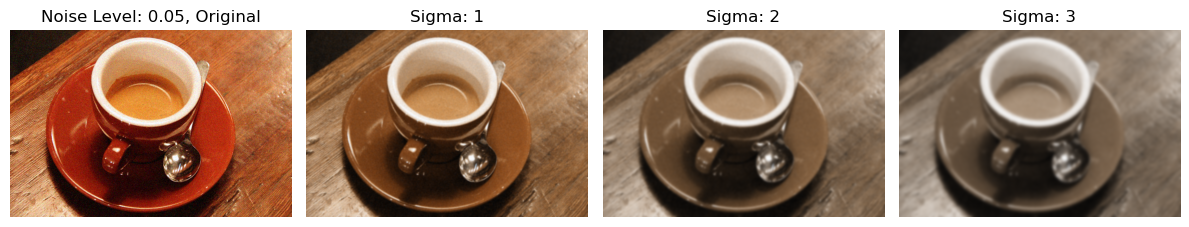

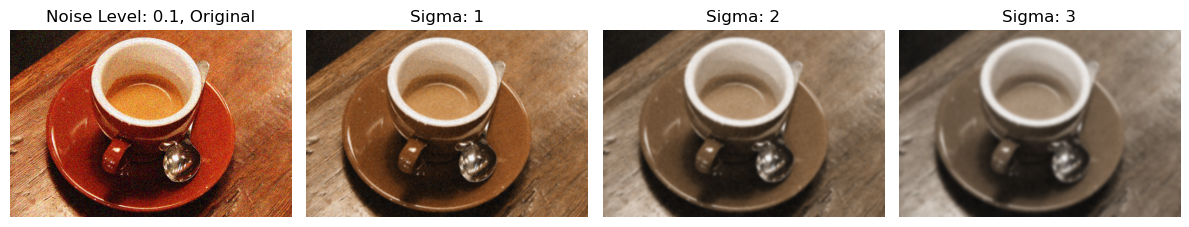

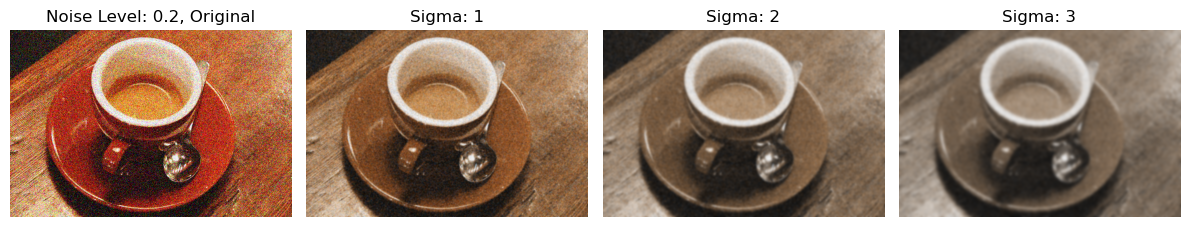

In [11]:
# Task 4: Explore the effect of sigma in Gaussian filter
sigma_values = [1, 2, 3]  # Adjust sigma values as needed

for i, noise_level in enumerate(noise_levels):
    noisy_image = random_noise(coffee, mode=noise_type, var=noise_level**2)  # Use var for Gaussian
    fig, axes = plt.subplots(1, len(sigma_values) + 1, figsize=(12, 4))
    axes[0].imshow(noisy_image, cmap='gray')
    axes[0].set_title(f'Noise Level: {noise_level}, Original')
    axes[0].axis('off')

    for j, sigma in enumerate(sigma_values):
        filtered_image = gaussian(noisy_image, sigma=sigma)
        axes[j + 1].imshow(filtered_image, cmap='gray')
        axes[j + 1].set_title(f'Sigma: {sigma}')
        axes[j + 1].axis('off')

    plt.tight_layout()

  # Comment on the effect of sigma:
    # As sigma increases, the Gaussian filter becomes more blurred, smoothing out the noise
    # but also potentially losing fine details in the image.

Brick Fraction: 0.1902
Edge Fraction: 0.9857


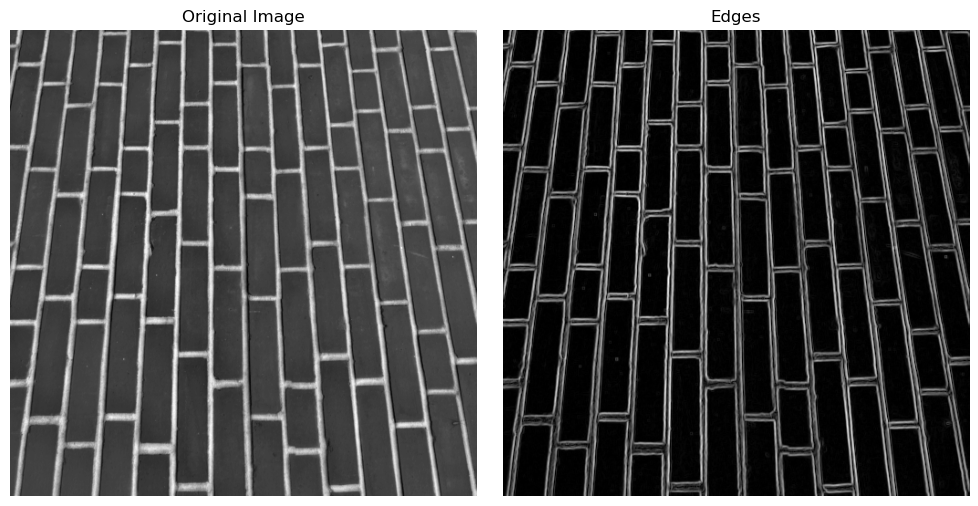

In [12]:
# Task 5: Detect edges and quantify fractions
bricks = data.brick()
edges = prewitt(bricks)

# Calculate fractions
total_pixels = bricks.size
brick_pixels = np.count_nonzero(bricks > 128)  # Assuming bricks are brighter
edge_pixels = np.count_nonzero(edges)

brick_fraction = brick_pixels / total_pixels
edge_fraction = edge_pixels / total_pixels

print(f"Brick Fraction: {brick_fraction:.4f}")
print(f"Edge Fraction: {edge_fraction:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(bricks, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Edges')
axes[1].axis('off')
plt.tight_layout()

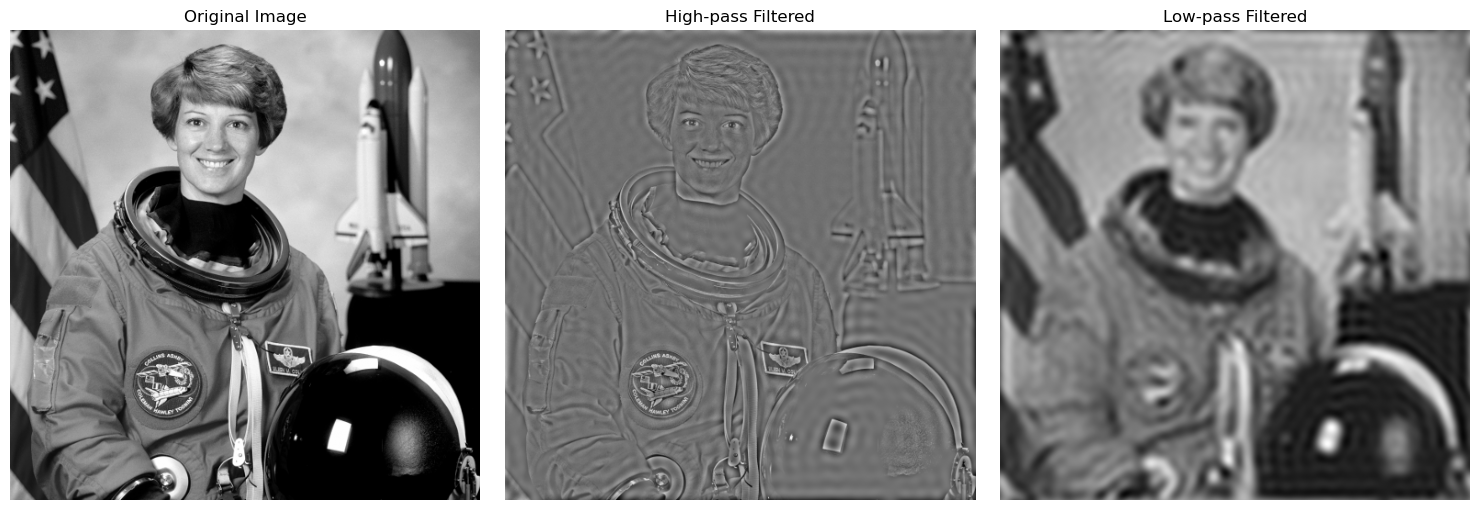

In [13]:
# Task 6: Apply high-pass and low-pass filters

from skimage import data, io, filters, util
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

# Load the 'astronaut' image
image = data.astronaut()
image_gray = rgb2gray(image)

# Fourier Transform
image_fft = np.fft.fft2(image_gray)
image_fft_shifted = np.fft.fftshift(image_fft)

# Create high-pass and low-pass masks
rows, cols = image_gray.shape
crow, ccol = rows // 2, cols // 2
mask_radius = 30  # Adjust radius for filter strength

# High-pass mask
mask_hp = np.ones((rows, cols), np.uint8)
mask_hp[crow - mask_radius:crow + mask_radius, ccol - mask_radius:ccol + mask_radius] = 0

# Low-pass mask
mask_lp = np.zeros((rows, cols), np.uint8)
mask_lp[crow - mask_radius:crow + mask_radius, ccol - mask_radius:ccol + mask_radius] = 1

# Apply masks and inverse transform
image_hp = np.fft.ifft2(np.fft.ifftshift(image_fft_shifted * mask_hp)).real
image_lp = np.fft.ifft2(np.fft.ifftshift(image_fft_shifted * mask_lp)).real

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image_hp, cmap='gray')
axes[1].set_title('High-pass Filtered')
axes[1].axis('off')
axes[2].imshow(image_lp, cmap='gray')
axes[2].set_title('Low-pass Filtered')
axes[2].axis('off')
plt.tight_layout()

In [14]:
# Task 7: Morphological erosions to remove blobs
blobs = binary_blobs(length=32, blob_size_fraction=0.1, volume_fraction=0.5)
footprint = disk(3)
num_erosions = 0

while np.any(blobs):  # Check if any blobs remain
    blobs = erosion(blobs, footprint)
    num_erosions += 1

print(f"Number of erosions needed: {num_erosions}")


Number of erosions needed: 2
